In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import wave
import os.path as os
from scipy.fftpack import fft, ifft
from scipy.signal import filtfilt, butter
import spkit
print('spkit-version ', spkit.__version__)
import spkit as spk

spkit-version  0.0.9.7


In [14]:
carpeta = os.abspath('/Users/yann/Documents/Datos/EEG/') #localización del 
#archivo en tu computadora
datos = pd.read_csv(carpeta +'/H24_OC_OA.csv') #creación de un dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
datos #comando para presentar el dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
datos #comando para presentar el dataframe
#al que únicamente debes modificar el nombre del archivo con su extensión
fm=128 #frecuencia de muestreo
ti=0 #tiempo de inicio, debe ser número entero
tf=180 #tiempo final, debe ser número entero
pt=(tf-ti)*fm#numero de puntos
t1=ti*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2=tf*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
t=np.linspace(ti,tf,pt) 
escala=30
rg=int(tf/escala)
aaa=[]
for i in range (0,14):
    al=np.array(datos)[t1:t2,i]
    nyq = 128*0.5 #frecuencia de muestreo y ripple
    low = 2 / nyq #bandwith inferior
    high = 45 / nyq #bandwith superior
    b, a = butter(5, [low, high], btype='band')
    env = filtfilt(b, a, al)
    aaa.append(env)
tmp=pd.DataFrame(aaa, nombres)
datosfilt=tmp.transpose()
datosfilt

,EEG.AF3,EEG.F7,EEG.F3,EEG.FC5,EEG.T7,EEG.P7,EEG.O1,EEG.O2,EEG.P8,EEG.T8,EEG.FC6,EEG.F4,EEG.F8,EEG.AF4
0,-0.661021,-0.573951,-7.461084,-0.733479,-0.537200,-0.201892,0.129394,1.574238,0.370044,0.689013,-0.048961,-0.249294,-0.687617,-0.371391
1,7.133721,6.406329,6.745429,5.267759,2.669582,10.104725,17.506465,18.219829,18.375933,20.282426,11.215436,12.255393,12.640057,13.043478
2,7.499415,15.823866,10.854421,12.350395,0.655425,10.232674,25.162148,21.553444,22.251940,17.052776,8.764815,9.202542,7.174566,11.854657
3,-2.583810,8.744230,2.322482,8.192437,-2.520840,8.249315,22.367531,11.142803,6.296778,-2.367235,-2.250903,-1.239385,-7.458513,-0.667066
4,-7.484209,-3.569430,-7.057201,-2.028795,1.993742,7.993675,18.578011,-1.974151,-7.037154,-6.197838,-3.379987,-4.000839,-5.457122,-3.043784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035,7.314812,17.602848,-0.881165,8.017470,15.034431,12.347461,16.934803,14.954764,11.539598,9.947289,3.620773,-6.063129,8.943039,5.706265
23036,5.511773,13.301277,-7.737816,4.066023,6.905559,4.602137,7.723586,1.058057,-0.280781,-6.229463,-12.692491,-12.426261,-3.173012,-3.698940
23037,5.512127,4.065826,0.161710,5.506204,-0.947720,-2.055177,-2.794963,-6.684628,-2.722606,-3.909905,-13.120636,-6.433681,-7.069295,-3.028741
23038,2.838473,-0.540851,6.997377,5.193751,-2.261736,-2.603656,-4.308838,-6.079546,-0.592776,4.804424,-3.732233,-0.887318,-4.486352,-1.095086


In [16]:
#OC=datosfilt
ti=0
tf=120
fm=128
pt=(tf-ti)*fm
t=np.linspace(ti,tf,pt) 
fs=128

In [17]:
fm=128 #frecuencia de muestreo
ti_f=0 #tiempo de inicio, debe ser número entero
tf_f=30#tiempo final, debe ser número entero
pt_f=(tf_f-ti_f)*fm#numero de puntos
t1_f=ti_f*fm #nos ayuda a dar la posición de la fila para el tiempo inicial
t2_f=tf_f*fm #nos ayuda a dar la posición de la fila para el tiempo final
nombres=list(datos) #almacena los nombres de los encabezados en una lista
dt=1/fm
t_f=np.linspace(ti_f,tf_f,pt_f)
senal=np.array(datosfilt)[t1_f:t2_f,6]
np.int=int
senal=np.array(datosfilt)[t1_f:t2_f,6]
np.int=int

In [18]:
senal

array([  0.12939387,  17.50646462,  25.16214839, ..., -24.55152805,
       -23.74096204, -14.09538618], shape=(3840,))

In [19]:
len(t_f)

3840

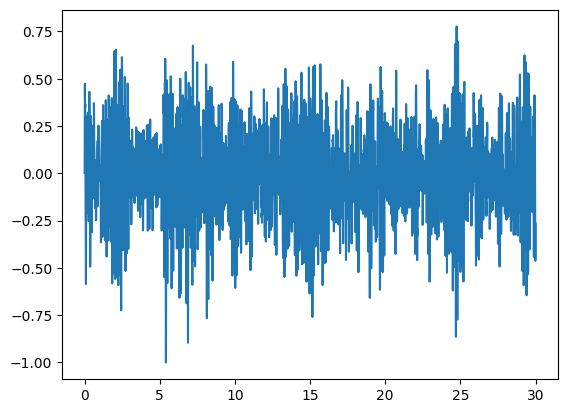

In [20]:
senal=senal-(np.mean(senal)); #normalización
senal=senal/np.std(senal);
senal=senal/max(abs(senal))
plt.plot(t_f,senal)

In [22]:
fr = pywt.scale2frequency('cmor1.5-1.0', [1, 2, 3, 4,5])/dt
fs = 1 / dt
coef,freqs=pywt.cwt(senal, fr, 'cmor',fs)

NameError: name 'pywt' is not defined